# Closest Pair of Points

[geeksforgeeks](https://www.geeksforgeeks.org/closest-pair-of-points-using-divide-and-conquer-algorithm/)

## Configuration

In [1]:
import sys
import numpy as np
import random, math
import logging, argparse, yaml, copy
import matplotlib.pyplot as plt
from utils.verbose import logging_time
from collections import deque

MAX = 1e10

SEED = 0
np.random.seed(seed=SEED)
random.seed(SEED)

VERBOSE = True
# setup logging
logging.basicConfig(
    format="%(asctime)s - %(message)s",
    datefmt="%m/%d/%Y %H:%M:%S",
    level=logging.INFO if VERBOSE else logging.WARNING)

## Naive 

Enumerate all pair distance, and take the minimum value.

$$
T(n) = O(n^2)
$$

In [2]:
def distance(a, b):
    """ get distance between 2 points. """
    return math.sqrt((a[0] - b[0]) ** 2 + (a[1] - b[1]) ** 2)

@logging_time
def cloest_naive(points):
    """ find minimum distance from enumerating all cases. """
    ans = MAX
    size = len(points)
    for i in range(size):
        for j in range(i+1, size):
            ans = min(ans, distance(points[i], points[j]))
    return ans

In [3]:
points = [(-4, 4), (-3, 2), (-2, -1), (-1.5, 4), (-1, -2), (0, 1), (1.5, 2), (2, 4), (3, 2), (3, 0), (4, 3), (4, -2)]
ans, _ = cloest_naive(points)
ans

1.4142135623730951

## Divide Conquer

We can improve 2D Closest pair of points algorithm using Divide and Conquer technique. <br>

### Key idea
1. find **mid point** in **linear time**.
2. get minimum distances of left, right **recursively**.
3. find **cross minimum distance** in **linear time**, and then return `min(left, right, cross)`

Therefore, if we take linear time quick selection algorithm in order to get mid point index, the time complexity is as follows.
$$
T(n) = 2T(n/2) + O(n) = O(nlogn)
$$

### Find mid point in linear time, and get minimum distances of left and right recursively.

In order to do that, we have to use **linear time mid point selection algorithm** based on **median of medians algorithm**. <br>
The detail algorithm is described at this [post](https://sungwookyoo.github.io/algorithms/QuickSortMedian/). <br>
Note that we have to transform the linear time selection algorithm to be operated by index, instead of ordered statistic. <br>

<span style="color:red">To simplify</span> this algorithm, I used **randomized** quick select algorithm, instead of linear time quick select algorithm. <br>
The overhead of randomized quick select algoritm, the worst case time complexity becomes $O(n^2)$. <br>
However, the average time is $O(n)$

Recursively find minimum distances of left and right part as follows.

<img src="https://media.geeksforgeeks.org/wp-content/uploads/mindis.png" width=300>

In [4]:
def partition(points, s, e, axis=0, verbose=False):
    """ randomized partition by axis
    points[i+1] finds the right place. """
    i = np.random.randint(s, e + 1)
    points[i], points[e] = points[e], points[i]
    pivot = points[e][axis]
    if verbose: print("{} is a pivot".format(points[e]))
    i = s - 1
    for j in range(s, e):
        if points[j][axis] <= pivot:
            i += 1
            points[i], points[j] = points[j], points[i]
    points[i + 1], points[e] = points[e], points[i + 1]
    return i + 1

def quick_select(points, s, e, k, axis=0):
    """ find the k-th smallest index of points by axis.
    please note that this algorithm returns `index`. """
    assert (not s > e) and (k >= 0), "index error!"
    if s == e: return e
    # q is pivot index
    q = partition(points, s, e, axis=axis)
    if k < q:
        return quick_select(points, s, q - 1, k, axis=axis)
    elif k == q:
        return q
    else:
        return quick_select(points, q + 1, e, k, axis=axis)

In [5]:
# check
for SEED in range(5):
    np.random.seed(seed=SEED)
    random.seed(SEED)
    sizes = list(range(5, 10, 10))
    for i, size in enumerate(sizes):
        points = [np.random.randint(-5 * size, 5 * size, size=2).tolist() for i in range(size)]
        # logging.info(points)
        q = partition(points, 0, size - 1, axis=0, verbose=False)
        logging.info("after partition ...")
        logging.info(points)
        logging.info("points[{}] = {}".format(q, points[q]))

03/12/2020 05:40:30 - after partition ...
03/12/2020 05:40:30 - [[-4, 11], [-25, -22], [-22, 14], [-16, -6], [19, 22]]
03/12/2020 05:40:30 - points[4] = [19, 22]
03/12/2020 05:40:30 - after partition ...
03/12/2020 05:40:30 - [[-25, -9], [-16, -14], [-20, -10], [-13, -17], [12, 18]]
03/12/2020 05:40:30 - points[3] = [-13, -17]
03/12/2020 05:40:30 - after partition ...
03/12/2020 05:40:30 - [[-7, -14], [-3, 18], [15, -18], [15, -10], [20, -17]]
03/12/2020 05:40:30 - points[1] = [-3, 18]
03/12/2020 05:40:30 - after partition ...
03/12/2020 05:40:30 - [[-25, -4], [-22, -17], [18, 16], [-6, -15], [17, -1]]
03/12/2020 05:40:30 - points[0] = [-25, -4]
03/12/2020 05:40:30 - after partition ...
03/12/2020 05:40:30 - [[-24, 15], [20, 5], [-2, -17], [-16, 14], [21, -20]]
03/12/2020 05:40:30 - points[0] = [-24, 15]


In [6]:
k = 2
logging.info("after select (point order changed) ... ")
logging.info("points[{}] is the {}-th smallest point".format(quick_select(points, 0, size - 1, k), k))
logging.info(points)

03/12/2020 05:40:30 - after select (point order changed) ... 
03/12/2020 05:40:30 - points[2] is the 2-th smallest point
03/12/2020 05:40:30 - [[-24, 15], [-16, 14], [-2, -17], [20, 5], [21, -20]]


In [7]:
# sanity check
for SEED in range(10):
    np.random.seed(seed=SEED)
    random.seed(SEED)
    sizes = list(range(1, 300, 10))
    for i, size in enumerate(sizes):
        """ generate 2D points within 10*size square. """
        points = [np.random.randint(-5 * size, 5 * size, size=2).tolist() for i in range(size)]
        test = copy.deepcopy(points)
        k = random.randint(0, size-1)
        i = quick_select(points, 0, size-1, k)
        pred = points[i]
        ans = sorted(test, key=lambda p: p[0])[k]
        # print("{}-th smallest point: {}.x == {}.x".format(k, pred, ans))
        assert pred[0] == ans[0]

### Find cross minimum distance to compare with left and right cases.

Assume that the algorithm takes left, right minimum distances recursively. <br>
Let `min(left, right)` be `d`.

**cross-minimum distance** can be found by enumerating all pair distance in left and right points. <br>
However, it takes $O(n/2 \times n/2) = O(n^2)$. This way does not improve naive case. <br>

In [8]:
def find_cross_min(points, s, q, e, recur_min, axis=0):
    """ find cross minimum distance from points[s:e+1]
    note that we already know
        points[q] is strictly larger than points[s:q]
        points[q] is strictly smaller than points[q+1:e]
    """
    left = []
    for i in range(s, q + 1):
        if points[q][axis] - points[i][axis] <= recur_min:
            left.append(points[i])

    right = []
    for i in range(q + 1, e + 1):
        if points[i][axis] - points[q][axis] <= recur_min:
            right.append(points[i])

    cross_min = MAX
    for p_l in left:
        for p_r in right:
            cross_min = min(cross_min, distance(p_l, p_r))
    return cross_min

In [9]:
@logging_time
def closest_recursive(points, s, e, axis=0):
    return closest(points, s, e, axis)

def closest(points, s, e, axis=0):
    """ find minimum distance from divide and conquer."""
    assert not (s > e), "index error!"
    # base cases
    if s == e: # self-distance is MAX.
        return MAX
    if e - s == 1:
        return distance(points[s], points[e])

    mid = (s + e) // 2
    q = quick_select(points, s, e, mid, axis=axis)

    # find minimum distance at each partition.
    left = closest(points, s, q, axis=axis)
    right = closest(points, q + 1, e, axis=axis)
    recur_min = min(left, right)
    cross_min = find_cross_min(points, s, q, e, recur_min, axis=axis)
    return min(recur_min, cross_min)

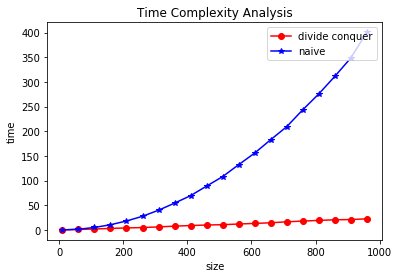

In [10]:
SEED = 0
np.random.seed(seed=SEED)
random.seed(SEED)
sizes = list(range(10, 1000, 50))
t1, t2 = [0] * len(sizes), [0] * len(sizes)
for i, size in enumerate(sizes):
    """ generate 2D points within 10*size square. """
    points = [np.random.randint(-5 * size, 5 * size, size=2).tolist() for i in range(size)]
    ans1, t1[i] = closest_recursive(points, 0, size - 1, axis=0)
    ans2, t2[i] = cloest_naive(points)
    assert ans1 == ans2

plt.xlabel('size')
plt.ylabel('time')
plt.title("Time Complexity Analysis")
plt.plot(sizes, t1, 'o-r', label="divide conquer")
plt.plot(sizes, t2, '*-b', label='naive')
plt.legend(loc='upper right')
plt.show()

### How can we find **cross-minimum distance** in **linear time**?

Please note that following facts.
    <ul>
        <li> The points are <b>partitioned by mid-point</b> along the axis-x since the algorithm uses a quick selection algorithm by axis-x.<br> </li>
        <li> We already know d=min(left, right), so pruning can be possible by only seeing points <b>within the strip</b>. <br> 
            <img src="https://media.geeksforgeeks.org/wp-content/uploads/closepair.png" width=300 align='center'> </li>
        <li> There are up to <span style="color:red"><b>6 points</b></span> on the opposite side with a distance less than the minimum distance. <br> 
            Therefore, it takes O(6n/2) = O(n)
            <details>
            This is because we get left-minimum and right-minimun distances recursively. <br>
            There are <b>no pairs within the (left or right) part</b> where the distance <b>is less than the minimum</b> (left, right). <br> 
            <img src="https://i.stack.imgur.com/14Uv0.jpg" width=300>
            </details>
        </li>
    </ul>

Therefore, it can be poosible to find cross-minimum distacne in linear time. <br>
    <span style="color:red">However</span>, **merging points by another axis-y** is necessary to remove candidates with six candidates in addition to partitioning by axis-x.

In [11]:
def merge(points, s, q, e):
    """ sort by merging pre-sorted left and right along one axis. """
    n1 = q - s + 1
    n2 = e - q
    L, R = [], []
    for i in range(n1):    # L[0.. n1-1] <- A[p..q] 
        L.append(points[s + i])  
    for j in range(n2):
        R.append(points[q + j + 1])  # R[0.. n2-1] <- A[q+1..r]
    L.append([-MAX, -MAX])
    R.append([-MAX, -MAX]) 
    i, j = 0, 0
    # merge L[i] and R[j] in order to sort A[p.. q]
    for k in range(s, e + 1):
        if L[i][1] >= R[j][1]:
            points[k] = L[i]
            i += 1
        else: 
            points[k] = R[j]
            j += 1 
            
def merge_sort(points, s, e):  # A[p..r]까지 sorting 
    if s >= e: return    
    q = (s + e) // 2     
    merge_sort(points, s, q)
    merge_sort(points, q + 1, e)
    merge(points, s, q, e)

In [12]:
for SEED in range(5):
    SEED = 0
    np.random.seed(seed=SEED)
    random.seed(SEED)
    sizes = list(range(10, 1000, 50))
    for i, size in enumerate(sizes):
        points = [np.random.randint(-5 * size, 5 * size, size=2).tolist() for i in range(size)]
        # logging.info(points)
        merge_sort(points, 0, size - 1)
        # logging.info("after sorting ...")
        assert points ==sorted(points, key=lambda p: p[1], reverse=True), "not sorted"
    print("pass")

pass
pass
pass
pass
pass


#### Note 
Note that partitioned results will be changed if we call merge recursively. <br>
In that, pivot posiiton is changed after recursion, so keep pivot of axis-x as `qx`. <br>
Also, find_cross_min_v2 is improved mathmatically because we only search strip line at most 6 element per each point. <br>

In [13]:
def find_cross_min_v2(points, s, q, e, d, qx):
    """ find cross minimum distance from points[s:e+1] 
    note that left and right sorted by axis-y. """
    # test = copy.deepcopy(points)
    # assert points[s:q+1] == sorted(test[s:q+1], key=lambda x: x[1], reverse=True), "{}".format(points[s:q+1])
    # assert points[q+1: e+1] == sorted(test[q+1: e+1], key=lambda x: x[1], reverse=True), "{}".format(points[q+1:e+1])
    
    # pruning point: keep only points within strip.
    left = [points[i] for i in range(s, q + 1) if abs(qx - points[i][0]) <= d]
    right = [points[i] for i in range(q + 1, e + 1) if abs(qx - points[i][0]) <= d]
    strip = copy.deepcopy(left + right)
    merge(strip, 0, len(left)-1, len(strip)-1) 
    
    cross = d
    for i in range(len(strip)-1):
        for j in range(i+1, min(i+7, len(strip))):
            cross = min(cross, distance(strip[i], strip[j]))
    return cross

In [14]:
@logging_time
def closest_recursive_v2(points, s, e):
    return closest_v2(points, s, e)

def closest_v2(points, s, e):
    """ find minimum distance from divide and conquer."""
    assert not (s > e), "index error!"
    # base cases
    if s == e: # self-distance is MAX.
        return MAX
    if e - s == 1: # merge for length 2 case.
        if points[s][1] < points[e][1]:
            points[s], points[e] = points[e], points[s]
        return distance(points[s], points[e])
    
    mid = (s + e) // 2
    q = quick_select(points, s, e, mid)
    # keep points[q] axis-x because points are sorted by y-axis after pass closest(..) merge
    qx = points[q][0]

    # find minimum distance at each partition.
    left = closest_v2(points, s, q)
    right = closest_v2(points, q + 1, e)
    recur_min = min(left, right)
    cross_min = find_cross_min_v2(points, s, q, e, recur_min, qx)
    merge(points, s, q, e) # this line is added
    return min(recur_min, cross_min)

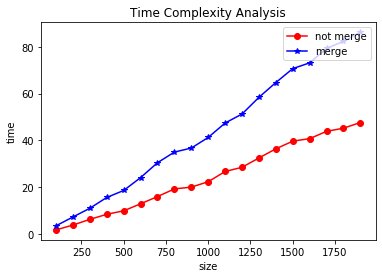

In [15]:
for SEED in range(1):
    # SEED = random.randint(0, 100)
    np.random.seed(seed=SEED)
    random.seed(SEED)
    sizes = list(range(100, 2000, 100))
    t1, t2 = [0] * len(sizes), [0] * len(sizes)
    for i, size in enumerate(sizes):
        """ generate 2D points within 10*size square. """
        points = [np.random.randint(-5 * size, 5 * size, size=2).tolist() for i in range(size)]
        # ans, _ = cloest_naive(points)
        ans1, t1[i] = closest_recursive(points, 0, size - 1)
        ans2, t2[i] = closest_recursive_v2(points, 0, size - 1)
        # print(ans, ans1, ans2)
        assert ans1 == ans2, "{}, {} {}".format(ans1, ans2, points)

    plt.xlabel('size')
    plt.ylabel('time')
    plt.title("Time Complexity Analysis")
    plt.plot(sizes, t1, 'o-r', label="not merge")
    plt.plot(sizes, t2, '*-b', label="merge")
    plt.legend(loc='upper right')
    plt.show()

# Reference:
[blog](https://medium.com/@andriylazorenko/closest-pair-of-points-in-python-79e2409fc0b2)